In [1]:
import re
from pathlib import Path
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt

from NewUtils import logger,multcomparativa
from collections import defaultdict
from scipy.signal import argrelextrema

In [2]:
# plt.style.available

In [3]:
# plt.style.use('petroff10')

In [4]:
# Alpha=logger.log_entries('Utils_LOGS/00000023.log')

In [5]:
Zeta=multcomparativa.MultiCompar('FinishedSamples/Alt_4_V_4')

<Axes: title={'center': 'Altitud 4 m y GS 4 m/s'}, xlabel='AccZ $[m/s^2]$', ylabel='Ensayos'>

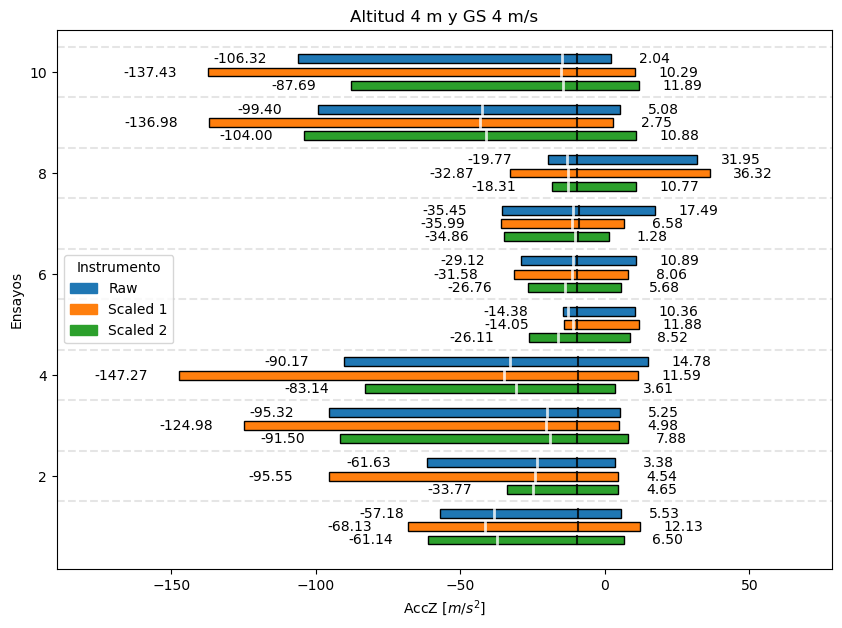

In [6]:
Zeta.multi_ensayo_imu()

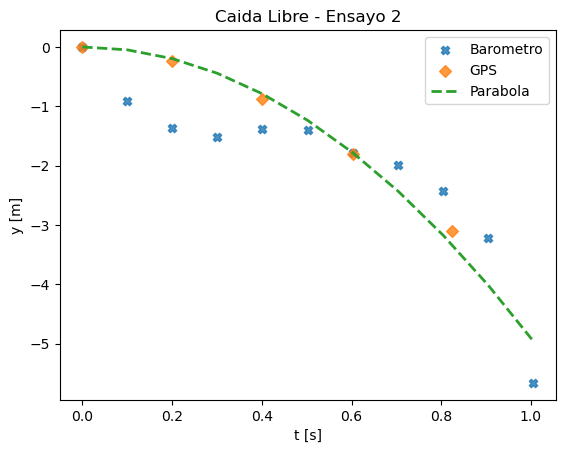

In [7]:
Zeta.single_plot_fit_cuadratic(2,show_baro=True)

In [8]:
DRE=multcomparativa.MetaComparLineal(4)

<Axes: title={'center': 'Ajuste parabólico (GPS) a 4 m'}, xlabel='GS [m/s]', ylabel='R²'>

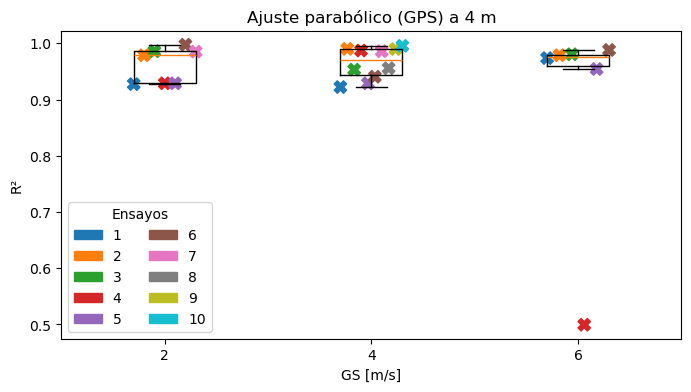

In [9]:
DRE.plot_alt_cte_vs_gs_box()

<Axes: title={'center': 'Medicion Global a 4 m'}, xlabel='AccZ [m/s²]', ylabel='GS [m/s]'>

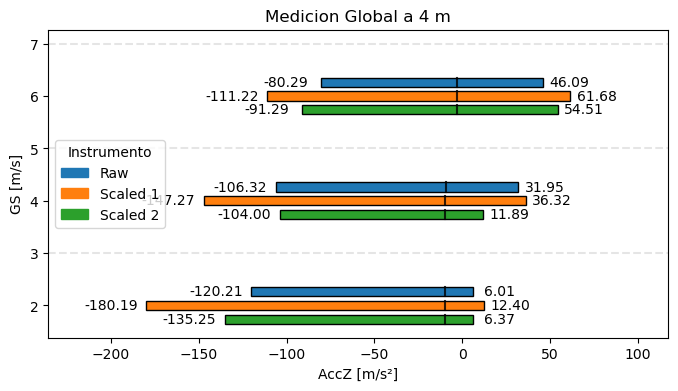

In [37]:
DRE.plot_accz(entry=4)

In [11]:
DR=multcomparativa.MetaComparClimb(4)

<Axes: title={'center': 'Ajuste parabólico (GPS) a 4 m/s'}, xlabel='Climb [º]', ylabel='R²'>

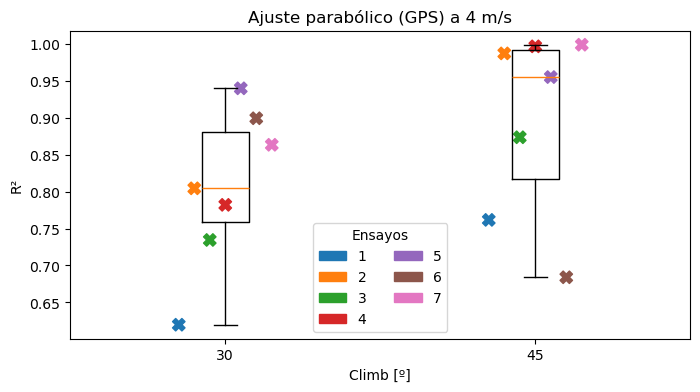

In [12]:
DR.plot_gs_cte_vs_climb_box()

In [26]:
fer=multcomparativa.MultiCompar('FinishedSamples/Climb_30_V_4')

In [27]:
datos=fer.ajustar_y_comparar(7,4*np.sin(np.deg2rad(25)))['Teorico']
datos_2=fer.ajustar_y_comparar(7,4*np.sin(np.deg2rad(25)))['Experimental']

In [28]:
datos_2

{'coeffs_baro': array([-2.04344385,  0.15156064,  0.        ]),
 'coeffs_gps': array([-4.28913925,  0.615876  ,  0.        ]),
 'climb_angle_º': np.float64(8.857006552850898),
 't_baro': [np.float64(0.0),
  np.float64(0.10048599999999999),
  np.float64(0.200731),
  np.float64(0.30122899999999997),
  np.float64(0.40129899999999996),
  np.float64(0.502087),
  np.float64(0.601954),
  np.float64(0.703356),
  np.float64(0.8038069999999999),
  np.float64(0.9048109999999999)],
 't_gps': [np.float64(0.0),
  np.float64(0.200488),
  np.float64(0.401487),
  np.float64(0.581795),
  np.float64(0.824)],
 'y_baro_pred': array([ 0.        , -0.00540382, -0.05191343, -0.13976541, -0.26825688,
        -0.4390379 , -0.64920652, -0.90431033, -1.1984552 , -1.53579889]),
 'y_baro': [np.float64(0.0),
  np.float64(-0.08999999999997499),
  np.float64(-0.21999999999997044),
  np.float64(-0.3299999999999841),
  np.float64(-0.19999999999998863),
  np.float64(-0.44999999999998863),
  np.float64(-0.4799999999999613

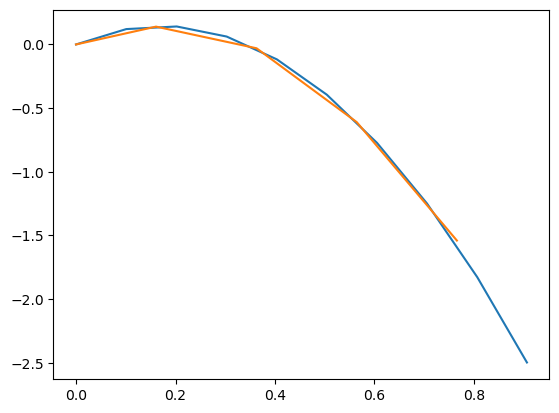

In [16]:
plt.plot(datos['t'],datos['y_pred'])
plt.plot(datos_2['t_gps'],datos_2['y_gps'])

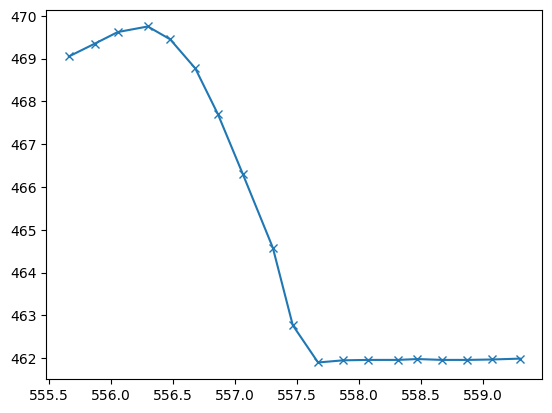

In [17]:
gps_i=fer.GPS
cosa=gps_i[gps_i['Ensayo']==4]
plt.plot(cosa['Time']*1e-6,cosa['Alt'],marker='x')


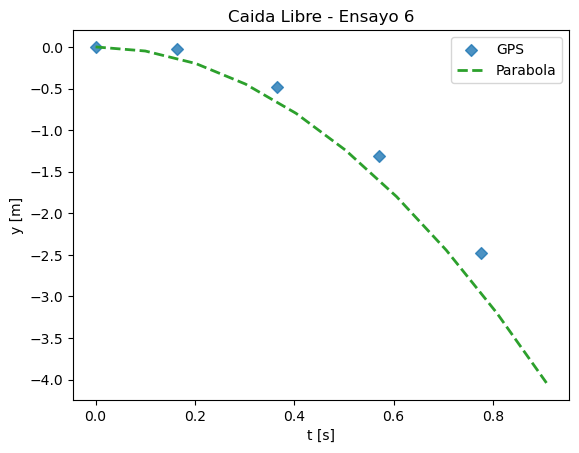

In [18]:

fer.single_plot_fit_cuadratic(6)

In [19]:
fer.ajustar_y_comparar(6,0)['Teorico']

{'coeffs_': [-4.905, np.float64(0.0), 0],
 't': [np.float64(0.0),
  np.float64(0.10001199999999999),
  np.float64(0.201813),
  np.float64(0.301792),
  np.float64(0.403491),
  np.float64(0.503432),
  np.float64(0.605857),
  np.float64(0.705861),
  np.float64(0.807654),
  np.float64(0.9075949999999999)],
 'y_pred': array([ 0.        , -0.04906177, -0.19977323, -0.44673961, -0.79855846,
        -1.24314173, -1.80044257, -2.44386598, -3.19955595, -4.0403892 ]),
 'r2_ref_baro': np.float64(-1.9983704526172774),
 'r2_ref_gps': np.float64(0.9224518884321626)}

In [20]:
# ala=Alpha['IMU'][0]['AccZ']
# logger.accZ_time_peaks(Alpha)

In [21]:
# Beta=logger.filter_time(Alpha,868619577)

In [22]:
# logger.save_log(Beta,45,4,mode='climb')

In [23]:
# fer=logger.SoloPlot(Beta)

In [24]:
# fer.global_coherent_Acc[0].keys()

In [25]:
# plt.plot(fer.global_coherent_Acc[0]['Time_ahr2'], fer.global_coherent_Acc[0]['AccZ'][0], label='AccZ')
# plt.plot(fer.global_coherent_Acc[0]['Time_ahr2'], fer.global_coherent_Acc[0]['global_AccZ'], label='Global AccZ')
# plt.legend()